In [51]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from src.predict import inference
from src.dataset import get_load_data
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt

In [53]:
train_set, _ = get_load_data(root = "../../data", dataset = "Flowers102")
train_dataloader = DataLoader(train_set, batch_size=5, shuffle = True)
img = next(iter(train_dataloader))[0]

In [54]:
trained_model_path = "../model_weights/model_weights.pt"

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load(trained_model_path, map_location=torch.device(device))

In [55]:
results = inference(model, img.to(device))
img_to_show = results[0].detach().cpu().numpy()

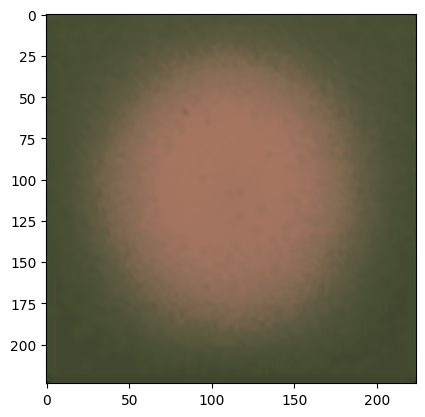

In [56]:
plt.imshow(img_to_show.transpose(1,2,0))
plt.show()